In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "car_data.csv"  # Update this to the correct path if needed
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# --- Data Preprocessing ---
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Create a new column for car age
data['Car_Age'] = 2024 - data['Year']  # Assuming current year is 2024
data.drop('Year', axis=1, inplace=True)




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

First 5 Rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           

In [7]:
# Encode categorical features
encoder = LabelEncoder()
data['Fuel_Type'] = encoder.fit_transform(data['Fuel_Type'])  # Petrol = 2, Diesel = 1, CNG = 0
data['Selling_Type'] = encoder.fit_transform(data['Selling_type'])  # Dealer = 0, Individual = 1
data['Transmission'] = encoder.fit_transform(data['Transmission'])  # Manual = 1, Automatic = 0


In [11]:
# Ensure column names are clean
data.columns = data.columns.str.strip().str.replace(r'\s+', '', regex=True)

# Check column names
print("Columns in dataset:", data.columns.tolist())

# Drop the column if it exists
if 'Car_Name' in data.columns:
    data.drop('Car_Name', axis=1, inplace=True)
else:
    print("'Car_Name' column is not found in the dataset. Double-check the dataset.")

# Standardize column names
data.columns = data.columns.str.strip().str.lower()  # Convert all columns to lowercase
print(data.columns.tolist())  # Verify column names

Columns in dataset: ['selling_price', 'present_price', 'driven_kms', 'fuel_type', 'selling_type', 'transmission', 'owner', 'car_age', 'selling_type']
'Car_Name' column is not found in the dataset. Double-check the dataset.
['selling_price', 'present_price', 'driven_kms', 'fuel_type', 'selling_type', 'transmission', 'owner', 'car_age', 'selling_type']


In [13]:
data = data.loc[:, ~data.columns.duplicated()]
print(data.columns)  # Verify unique column names


Index(['selling_price', 'present_price', 'driven_kms', 'fuel_type',
       'selling_type', 'transmission', 'owner', 'car_age'],
      dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode 'fuel_type', 'selling_type', and 'transmission'
data['fuel_type'] = encoder.fit_transform(data['fuel_type'])
data['selling_type'] = encoder.fit_transform(data['selling_type'])
data['transmission'] = encoder.fit_transform(data['transmission'])

# Verify the transformation
print(data.head())


   selling_price  present_price  driven_kms  fuel_type  selling_type  \
0           3.35           5.59       27000          2             0   
1           4.75           9.54       43000          1             0   
2           7.25           9.85        6900          2             0   
3           2.85           4.15        5200          2             0   
4           4.60           6.87       42450          1             0   

   transmission  owner  car_age  
0             1      0       10  
1             1      0       11  
2             1      0        7  
3             1      0       13  
4             1      0       10  


<ipython-input-14-dacc676fd7c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel_type'] = encoder.fit_transform(data['fuel_type'])
<ipython-input-14-dacc676fd7c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_type'] = encoder.fit_transform(data['selling_type'])
<ipython-input-14-dacc676fd7c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [15]:
# Define Features (X) and Target (y)
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(240, 7) (61, 7) (240,) (61,)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.6389196721311476
Mean Squared Error: 0.9382767457377043
Root Mean Squared Error: 0.9686468632776881
R-squared: 0.9592683769360726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


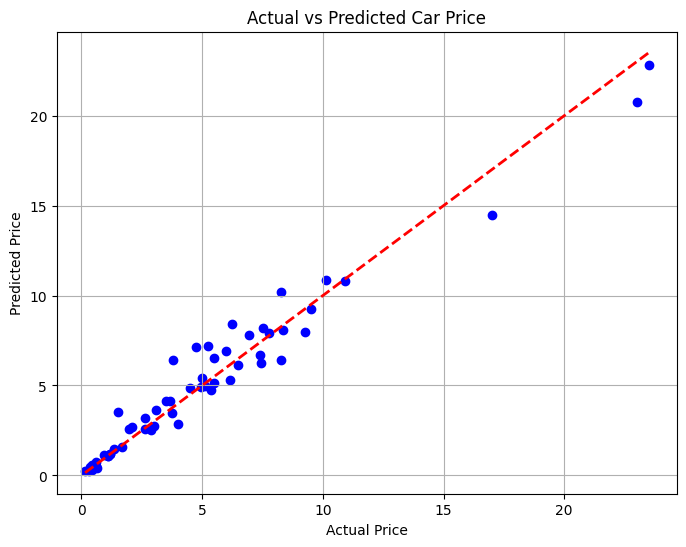

In [18]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


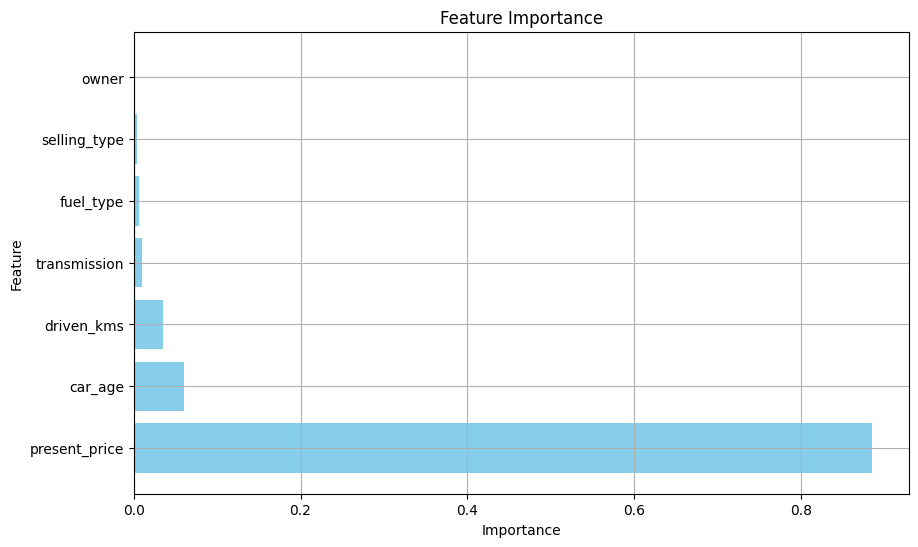

In [19]:
# Plot feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [20]:
import joblib

# Save the model
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']

In [21]:
# Load the saved model
model = joblib.load('car_price_model.pkl')

# Predict for new data
new_data = [[10000, 5.0, 40000, 1, 1, 1, 0]]  # Example new car data
new_prediction = model.predict(new_data)
print(f"Predicted Car Price: {new_prediction[0]:.2f}")


Predicted Car Price: 30.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
